# Understanding granger causality

## Imports

In [74]:
# Pandas is an open source data analysis and manipulation tool
import pandas as pd

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

import numpy as np

import matplotlib.pyplot as plt

## Create trending test dataframe with equal columns

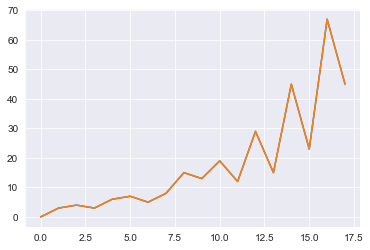

In [57]:
trending_data = np.array([0, 3, 4, 3, 6, 7, 5, 8, 15, 13, 19, 12, 29, 15, 45, 23, 67, 45])
trending_dataframe = pd.DataFrame(trending_data,columns=["Column_A"])
trending_dataframe["Column_B"] = trending_dataframe.Column_A
plt.plot(trending_dataframe)


## Create stationary test dataframe with equal columns

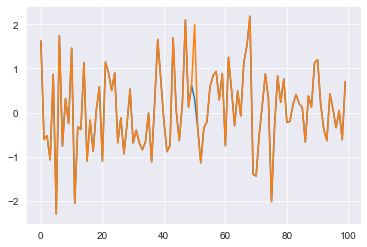

In [119]:
#make this example reproducible
np.random.seed(1)

#create time series data
stationary_data = np.random.normal(size=100)
#array to df
stationary_dataframe = pd.DataFrame(stationary_data,columns=["Column_A"])
#create new equal column
stationary_dataframe["Column_B"] = stationary_dataframe.Column_A

stationary_dataframe.at[50,"Column_B"] = 2


plt.plot(stationary_dataframe)

## Test for stationary (ADF)

In [102]:
def adf_test(dataframe):
    dataframe = dataframe.fillna(0)
    for column in dataframe:
        result = adfuller((dataframe[column].values))
        print(column)
        print(f'Test Statistics: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'critical_values: {result[4]}')
        print()
        if result[1] > 0.05:
            print("Series is not stationary")
        else:
            print("Series is stationary")
        print()

Wenn pValue größer ist als 0.05 können wir die Nullhypothese nicht zurückweisen
-> Zeitreihe ist nicht stationär

## Test for non trending or seasonal (KPSS)

Wenn der pValue größer als 0.05 ist, können wir die Nullhypothese des KPSS Tests nicht zurückweisen.
-> Zeitreihe is trendstabil

p-Value >0.05 = Trendstabil
p-Value <0.05 = nicht Trendstabil

Wir müssen das Argument regression='ct' verwenden, um anzugeben, dass die Nullhypothese des Tests lautet, dass die Daten trendstabil sind.

In [134]:
def kpss_test(dataframe):
    dataframe = dataframe.fillna(0)
    for column in dataframe:
        print(column)
        kpss_statistic, kpss_pValue, kpss_nLags, kpss_criticalValues = kpss(pd.DataFrame(dataframe[column].values))

        print(f"kpss_statistic: {kpss_statistic}")
        print(f"kpss_pValue: {kpss_pValue}")
        print(f"kpss_nLags: {kpss_nLags}")
        print(f"kpss_criticalValues: {kpss_criticalValues}")
        print()



In [135]:
print("Trending Data! ")
kpss_test(trending_dataframe)

(print("Stationary Data"))
kpss_test(stationary_dataframe)

Trending Data! 
Column_A
kpss_statistic: 0.8405762366707027
kpss_pValue: 0.01
kpss_nLags: 1
kpss_criticalValues: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Column_B
kpss_statistic: 0.8405762366707027
kpss_pValue: 0.01
kpss_nLags: 1
kpss_criticalValues: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Column_A_diff
kpss_statistic: 0.219804798698658
kpss_pValue: 0.1
kpss_nLags: 5
kpss_criticalValues: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Column_B_diff
kpss_statistic: 0.219804798698658
kpss_pValue: 0.1
kpss_nLags: 5
kpss_criticalValues: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Stationary Data
Column_A
kpss_statistic: 0.1814987908883023
kpss_pValue: 0.1
kpss_nLags: 0
kpss_criticalValues: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Column_B
kpss_statistic: 0.19715977695123552
kpss_pValue: 0.1
kpss_nLags: 1
kpss_criticalValues: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



C:\Users\Jan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\Jan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\Jan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Jan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than 

## Test again for stationary

In [136]:
adf_test(stationary_dataframe)

Column_A
Test Statistics: -7.158368056683859
p-value: 3.012966013609412e-10
critical_values: {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}

Series is stationary

Column_B
Test Statistics: -10.32471173816498
p-value: 2.9463430694084915e-18
critical_values: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}

Series is stationary



## Test again for trend stability

In [137]:
kpss_test(trending_dataframe)

Column_A
kpss_statistic: 0.8405762366707027
kpss_pValue: 0.01
kpss_nLags: 1
kpss_criticalValues: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Column_B
kpss_statistic: 0.8405762366707027
kpss_pValue: 0.01
kpss_nLags: 1
kpss_criticalValues: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Column_A_diff
kpss_statistic: 0.219804798698658
kpss_pValue: 0.1
kpss_nLags: 5
kpss_criticalValues: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Column_B_diff
kpss_statistic: 0.219804798698658
kpss_pValue: 0.1
kpss_nLags: 5
kpss_criticalValues: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



C:\Users\Jan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\Jan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\Jan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Jan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than 

# Granger Testing

3.1 x2-Test (Chi-Quadrat-Test)
H0 sagt aus, dass die Wahrscheinlichkeit für eine Merkmalsausprägung in zwei Gruppen gleich ist.
H1 sagt aus, dass die Wahrscheinlichkeit für eine Merkmalsausprägung in zwei Gruppen verschieden ist.

3.2 Verbundener t-Test
H0 sagt aus, dass die erwartete Differenz zwischen zwei abhängigen Stichproben gleich "0" ist.
H1 sagt aus, dass die erwartete Differenz zwischen zwei abhängigen Stichproben von "0" verschieden ist.

3.3 Unverbundener t-Test
H0 sagt aus, dass die Erwartungswerte von zwei unabhängigen Stichproben übereinstimmen.
H1 sagt aus, dass die Erwartungswerte von zwei unabhängigen Stichproben verschieden sind.

## Time series are equal

Wenn die Zeitreihen exakt gleich sind ist:
 - F test statistic immer 0
 - p Value immer 1

In [138]:
granger_test_result = grangercausalitytests(stationary_dataframe[["Column_A","Column_B"]], maxlag=7)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1926  , p=0.6618  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=0.1986  , p=0.6559  , df=1
likelihood ratio test: chi2=0.1984  , p=0.6560  , df=1
parameter F test:         F=0.1926  , p=0.6618  , df_denom=96, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0389  , p=0.3579  , df_denom=93, df_num=2
ssr based chi2 test:   chi2=2.1894  , p=0.3346  , df=2
likelihood ratio test: chi2=2.1653  , p=0.3387  , df=2
parameter F test:         F=1.0389  , p=0.3579  , df_denom=93, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6620  , p=0.5776  , df_denom=90, df_num=3
ssr based chi2 test:   chi2=2.1405  , p=0.5438  , df=3
likelihood ratio test: chi2=2.1172  , p=0.5484  , df=3
parameter F test:         F=0.6620  , p=0.5776  , df_denom=90, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6202  , p=0.6493  , df_d

## Nearly equal time series are shifted
Shifted time series is granger caused by non shifted

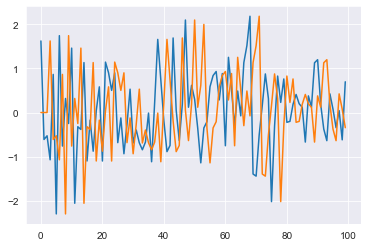

In [139]:
#copy datafrmae
stationary_shifted1_dataframe = stationary_dataframe.copy()
# shift Column B one day and fill with 0
stationary_shifted1_dataframe["Column_B"] = stationary_shifted1_dataframe["Column_B"].shift(periods=3,fill_value=0)
plt.plot(stationary_shifted1_dataframe)

## Column A is causing shifted Column B

Result: Column A IS granger causing Column B

In [140]:
number_of_lags = 7

#perform granger test
granger_test_result = grangercausalitytests(stationary_shifted1_dataframe[["Column_B","Column_A"]], maxlag=number_of_lags)


test_name='ssr_ftest'
#column of result
column = 1
p_values = [round(granger_test_result[i+1][0]["ssr_ftest"][1],4) for i in range(number_of_lags)]




Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0683  , p=0.7944  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=0.0704  , p=0.7907  , df=1
likelihood ratio test: chi2=0.0704  , p=0.7908  , df=1
parameter F test:         F=0.0683  , p=0.7944  , df_denom=96, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1508  , p=0.8602  , df_denom=93, df_num=2
ssr based chi2 test:   chi2=0.3178  , p=0.8531  , df=2
likelihood ratio test: chi2=0.3173  , p=0.8533  , df=2
parameter F test:         F=0.1508  , p=0.8602  , df_denom=93, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=858.2115, p=0.0000  , df_denom=90, df_num=3
ssr based chi2 test:   chi2=2774.8839, p=0.0000  , df=3
likelihood ratio test: chi2=328.6372, p=0.0000  , df=3
parameter F test:         F=858.2115, p=0.0000  , df_denom=90, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=603.4315, p=0.0000  , df_

## Shifted Column B is causing Column A

Result: Column B is NOT granger causing Column 1

In [141]:
number_of_lags = 7

#perform granger test
granger_test_result = grangercausalitytests(stationary_shifted1_dataframe[["Column_A","Column_B"]], maxlag=number_of_lags)


test_name='ssr_ftest'
#column of result
column = 1
p_values = [round(granger_test_result[i+1][0]["ssr_ftest"][1],4) for i in range(number_of_lags)]



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4348  , p=0.5112  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=0.4484  , p=0.5031  , df=1
likelihood ratio test: chi2=0.4474  , p=0.5036  , df=1
parameter F test:         F=0.4348  , p=0.5112  , df_denom=96, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3314  , p=0.7187  , df_denom=93, df_num=2
ssr based chi2 test:   chi2=0.6985  , p=0.7052  , df=2
likelihood ratio test: chi2=0.6960  , p=0.7061  , df=2
parameter F test:         F=0.3314  , p=0.7187  , df_denom=93, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9644  , p=0.4132  , df_denom=90, df_num=3
ssr based chi2 test:   chi2=3.1184  , p=0.3737  , df=3
likelihood ratio test: chi2=3.0693  , p=0.3811  , df=3
parameter F test:         F=0.9644  , p=0.4132  , df_denom=90, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9789  , p=0.4234  , df_d

Weitere Erkenntnisse:
Nach dem P Wert 0 erreicht hat sind alle P Werte in darauffolgenden Lags ebenfalls 0